# Problem Statement:
- Goal is to create a classification model which can predict all positive classes correctly.(Recall Should be high.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Yash\\Downloads\\Client.csv",
                index_col=0)
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,1,0.0,1.0,0.0,50.0,34.940
1,3,0,1.0,0.0,0.0,18.0,0.891
2,66,0,0.0,1.0,0.0,5.0,0.330
3,70,1,0.0,1.0,1.0,31.0,0.037
4,96,0,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,0,0.0,1.0,0.0,NaN,0.576
1336,34110,1,1.0,1.0,0.0,46.0,3.705
1337,34113,0,1.0,1.0,0.0,39.0,0.099
1338,34145,1,1.0,0.0,0.0,8.0,3.177


In [3]:
df.drop(columns=['CASENUM'], inplace=True)

In [4]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,0,0.0,1.0,0.0,NaN,0.576
1336,1,1.0,1.0,0.0,46.0,3.705
1337,0,1.0,1.0,0.0,39.0,0.099
1338,1,1.0,0.0,0.0,8.0,3.177


In [5]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.511194,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,1.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [6]:
#Check missing values

In [8]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [ ]:
#Missing value imputation

In [9]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038


In [9]:
from sklearn.impute import SimpleImputer

In [10]:
si = SimpleImputer(strategy='most_frequent')

In [11]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038


In [12]:
df.iloc[:,1:4]

,CLMSEX,CLMINSUR,SEATBELT
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,1.0
4,0.0,1.0,0.0
...,...,...,...
1335,0.0,1.0,0.0
1336,1.0,1.0,0.0
1337,1.0,1.0,0.0
1338,1.0,0.0,0.0


In [13]:
si.fit_transform(df.iloc[:,1:4])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 1., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

In [14]:
df.iloc[:,1:4] = si.fit_transform(df.iloc[:,1:4])

In [15]:
df.isna().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [16]:
df['CLMAGE'].fillna(df['CLMAGE'].median(), inplace=True)

In [17]:
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [18]:
#Define x and y

In [19]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,0,0.0,1.0,0.0,30.0,0.576
1336,1,1.0,1.0,0.0,46.0,3.705
1337,0,1.0,1.0,0.0,39.0,0.099
1338,1,1.0,0.0,0.0,8.0,3.177


In [20]:
x = df.iloc[:,1:]
y = df['ATTORNEY']
y

0       1
1       0
2       0
3       1
4       0
       ..
1335    0
1336    1
1337    0
1338    1
1339    0
Name: ATTORNEY, Length: 1340, dtype: int64

In [21]:
x

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,30.0,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


# Model Building

In [22]:
#Split the data.

In [23]:
df.head(10)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038
5,1,1.0,1.0,0.0,35.0,0.309
6,1,0.0,1.0,0.0,9.0,3.538
7,1,1.0,1.0,0.0,34.0,4.881
8,0,1.0,1.0,0.0,60.0,0.874
9,0,0.0,1.0,0.0,30.0,0.350


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [26]:
xtrain

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1148,1.0,1.0,0.0,7.0,3.734
807,0.0,1.0,0.0,16.0,111.405
1287,0.0,0.0,0.0,10.0,0.040
590,1.0,1.0,0.0,6.0,0.100
1188,1.0,1.0,0.0,44.0,13.000
...,...,...,...,...,...
1095,0.0,1.0,0.0,47.0,0.080
1130,1.0,1.0,0.0,30.0,5.595
1294,1.0,1.0,0.0,30.0,1.041
860,1.0,0.0,0.0,55.0,1.769


In [27]:
ytrain

1148    0
807     1
1287    0
590     0
1188    1
       ..
1095    1
1130    1
1294    1
860     1
1126    0
Name: ATTORNEY, Length: 1072, dtype: int64

In [41]:
xtest

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
394,1.0,1.0,0.0,5.0,5.163
881,0.0,0.0,0.0,30.0,5.570
358,1.0,1.0,0.0,41.0,0.671
367,0.0,1.0,0.0,34.0,0.567
259,0.0,1.0,1.0,66.0,4.530
...,...,...,...,...,...
109,0.0,1.0,0.0,30.0,0.755
818,1.0,1.0,0.0,7.0,6.000
538,1.0,1.0,0.0,30.0,3.510
1286,1.0,1.0,1.0,44.0,55.709


In [42]:
ytest

394     1
881     1
358     0
367     1
259     1
       ..
109     1
818     1
538     0
1286    1
714     0
Name: ATTORNEY, Length: 268, dtype: int64

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
lg.coef_

array([[-0.36427295, -0.33524204,  0.70473018, -0.00883013,  0.41189508]])

In [45]:
xtest

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
394,1.0,1.0,0.0,5.0,5.163
881,0.0,0.0,0.0,30.0,5.570
358,1.0,1.0,0.0,41.0,0.671
367,0.0,1.0,0.0,34.0,0.567
259,0.0,1.0,1.0,66.0,4.530
...,...,...,...,...,...
109,0.0,1.0,0.0,30.0,0.755
818,1.0,1.0,0.0,7.0,6.000
538,1.0,1.0,0.0,30.0,3.510
1286,1.0,1.0,1.0,44.0,55.709


In [46]:
ytest

394     1
881     1
358     0
367     1
259     1
       ..
109     1
818     1
538     0
1286    1
714     0
Name: ATTORNEY, Length: 268, dtype: int64

In [61]:
ypred = lg.predict(xtest)
ypred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0], dtype=int64)

In [62]:
ypred = lg.predict(xtrain)
ypred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
print(ytrain[:25].values) #Actual
print(ypred[:25]) #Predicted

[0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1]
[1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0]


In [65]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
print(ytest[:25].values) #Actual
print(ypred[:25]) #Predicted

[1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0]
[1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0]


In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
confusion_matrix(ytest,ypred) #Sequence -> tn, fp, fn, tp

array([[113,  27],
       [ 43,  85]], dtype=int64)

<AxesSubplot:>

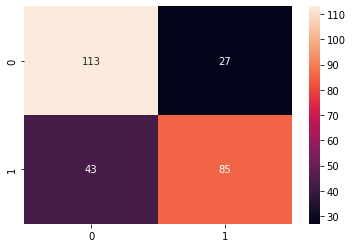

In [58]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True, fmt='g')

In [59]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       140
           1       0.76      0.66      0.71       128

    accuracy                           0.74       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.74      0.74      0.74       268

